

# PEC2: Insights datos Idealista

En esta PEC2, debéis hacer el mismo ejercicio que hemos hecho en el Notebook Insight_Datos_Teleco.ipynb pero con la información de Idealista que se os proporciona junto a este Notebook y el enunciado. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [1]:
%matplotlib inline

import re
import random
from collections import Counter
import os

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)




## 1. Lectura y unificación de datos. Puede ser tanto de la descarga de Idealista si hiciesteis la PEC1 versión con Claves, o directamente los 8 ficheros CSV. (2 puntos)

In [2]:
df_1 = pd.read_csv('BBDD_1.csv')
df_2 = pd.read_csv('BBDD_2.csv')
df_3 = pd.read_csv('BBDD_3.csv')
df_4 = pd.read_csv('BBDD_4.csv')
df_5 = pd.read_csv('BBDD_5.csv')
df_6 = pd.read_csv('BBDD_6.csv')
df_7 = pd.read_csv('BBDD_7.csv')
df_8 = pd.read_csv('BBDD_8.csv')

In [3]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], sort=False)




### Comprobar lectura correcta del dataset

In [4]:
df.head()


,Unnamed: 0,Unnamed: 0.1,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,labels,parkingSpace,newDevelopmentFinished
0,0.0,0.0,0.0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,flat,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso'}",True,False,False,False,False,False,NaN,NaN,NaN
1,1.0,1.0,1.0,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,NaN,178216.0,flat,...,"{'subtitle': 'El Guinardó, Barcelona', 'title': 'Piso en Calle del Xiprer'}",False,False,False,False,False,False,NaN,NaN,NaN
2,2.0,2.0,2.0,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,NaN,333000.0,flat,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso en Calle dels Còdols'}",False,False,True,False,False,False,NaN,NaN,NaN
3,3.0,3.0,3.0,96266051,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/dd/0e/ff/942136095.jpg,4113 ALIV,27.0,2,481000.0,flat,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,False,False,False,False,NaN,NaN,NaN
4,4.0,4.0,4.0,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,NaN,481000.0,flat,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,True,False,False,False,NaN,NaN,NaN




### Comprobar dimensiones del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21186 entries, 0 to 2113
Data columns (total 43 columns):
Unnamed: 0                17806 non-null float64
Unnamed: 0.1              5614 non-null float64
index                     12962 non-null float64
propertyCode              21186 non-null int64
thumbnail                 21067 non-null object
externalReference         18796 non-null object
numPhotos                 21186 non-null float64
floor                     15890 non-null object
price                     21186 non-null float64
propertyType              21186 non-null object
operation                 21186 non-null object
size                      21186 non-null float64
exterior                  21186 non-null bool
rooms                     21186 non-null float64
bathrooms                 21186 non-null float64
address                   21186 non-null object
province                  21118 non-null object
municipality              21186 non-null object
district                



## 2. Data Wrangling (4 puntos)



### Formateo de las variables (strings, numéricas y booleanas)

In [6]:
Types= ['float', 'float', 'float', 'str', 'str',
       'str', 'float', 'str', 'float',
       'str', 'str', 'float', 'bool',
       'float', 'float', 'str', 'str',
       'str', 'str', 'str', 'str', 'float', 'float', 'str', 
       'str', 'int', 'str', 'bool', 'str', 'str', 'str',
      'float', 'str', 'str', 'bool','str', 'str', 'str','str', 
       'str', 'str','str', 'str', 'str',]
dict_types = dict(zip(df.columns,Types))

In [7]:
df=df.astype(dict_types)



### Comprobación y eliminación de registros repetidos

In [8]:
duplicated = df.duplicated ('propertyCode')
duplicated.value_counts()

False    13091
True     8095 
dtype: int64

In [9]:
df=df.drop_duplicates('propertyCode')

In [10]:
duplicados=df.duplicated('propertyCode')
duplicados.value_counts()

False    13091
dtype: int64



### Comprobación de columnas que no aportan información

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)
df.head()


,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,labels,parkingSpace,newDevelopmentFinished
0,0.0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,flat,sale,63.0,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso'}",True,False,False,False,False,False,nan,nan,nan
1,1.0,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,nan,178216.0,flat,sale,65.0,...,"{'subtitle': 'El Guinardó, Barcelona', 'title': 'Piso en Calle del Xiprer'}",False,False,False,False,False,False,nan,nan,nan
2,2.0,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,nan,333000.0,flat,sale,97.0,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso en Calle dels Còdols'}",False,False,True,False,False,False,nan,nan,nan
3,3.0,96266051,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/dd/0e/ff/942136095.jpg,4113 ALIV,27.0,2,481000.0,flat,sale,65.0,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,False,False,False,False,nan,nan,nan
4,4.0,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,nan,481000.0,flat,sale,72.0,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,True,False,False,False,nan,nan,nan




### Estudio de la varianza para las variables numéricas

In [12]:
df_numerical = df.select_dtypes(include = ['int','float'])
df_numerical.head()

,index,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea
0,0.0,31.0,285000.0,63.0,2.0,2.0,41.380216,2.179157,1070,4524.0
1,1.0,54.0,178216.0,65.0,2.0,1.0,41.417458,2.177885,3449,2742.0
2,2.0,13.0,333000.0,97.0,4.0,1.0,41.379991,2.179267,1094,3433.0
3,3.0,27.0,481000.0,65.0,2.0,1.0,41.396123,2.158679,1388,7400.0
4,4.0,10.0,481000.0,72.0,2.0,1.0,41.392210,2.160275,1000,6681.0


In [13]:
variance = df_numerical.var(axis=0)
threshold=0.025
varianzas = [elemento for elemento in variance if elemento>threshold]
print(varianzas)

[7309.701188266187, 216.73463279521985, 91913626434.80443, 428265.9800553044, 1.956297945876753, 0.9882048204731174, 5.026462375317895, 9.057505445585445, 117087996.69644207, 3253509.9085174655]




### Estudio de agrupaciones para las variables categóricas

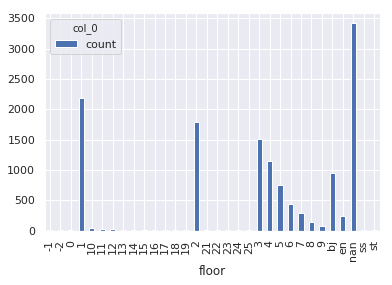

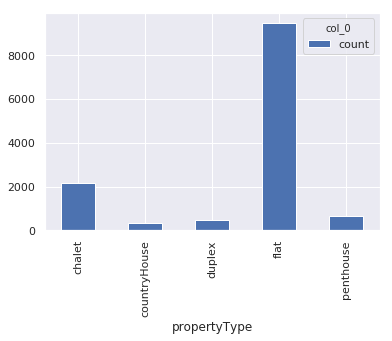

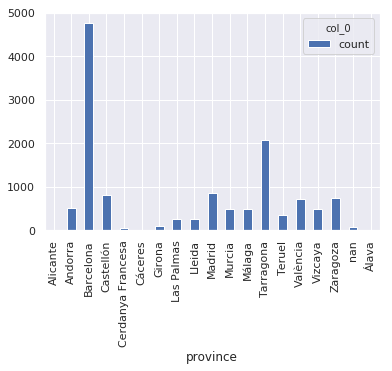

In [14]:
df_categorical = df.select_dtypes(include = 'O')
df_categorical_estudio = df_categorical[['floor', 'propertyType', 'province']]
for element in df_categorical_estudio.columns:
        my_table = pd.crosstab(index = df_categorical[element], columns="count")
        my_table.plot.bar()




### Comprobación y eliminación de nulos

In [15]:
df.isnull().any()

index                     True 
propertyCode              False
thumbnail                 False
externalReference         False
numPhotos                 False
floor                     False
price                     False
propertyType              False
operation                 False
size                      False
exterior                  False
rooms                     False
bathrooms                 False
address                   False
province                  False
municipality              False
district                  False
country                   False
neighborhood              False
latitude                  True 
longitude                 True 
showAddress               False
url                       False
distance                  False
description               False
hasVideo                  False
status                    False
newDevelopment            False
hasLift                   False
priceByArea               False
detailedType              False
suggeste

In [16]:
lista_viviendas_nulas=[]
for i, row in df.iterrows():
    if np.isnan(row['price']):
        lista_viviendas_nulas.append(row['propertyCode'])

lista_viviendas_nulas

[]



### Comprobación y eliminación de outliers

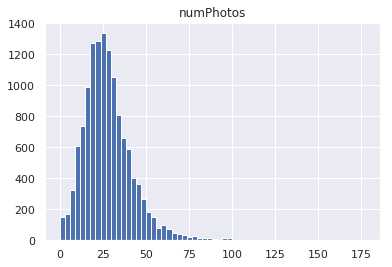

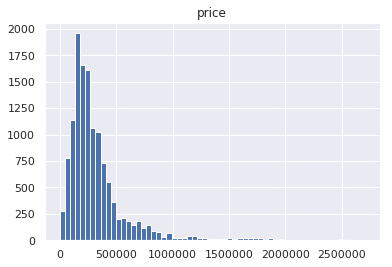

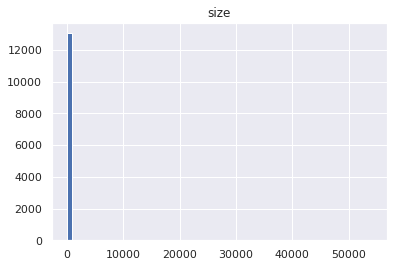

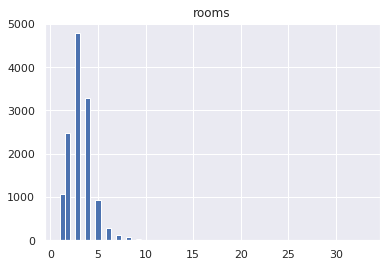

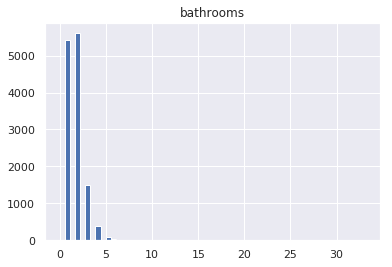

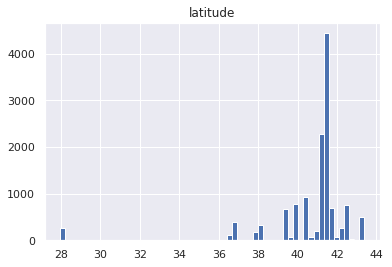

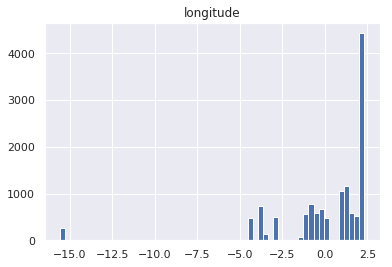

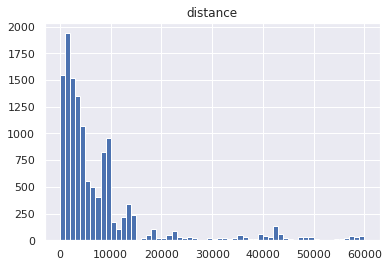

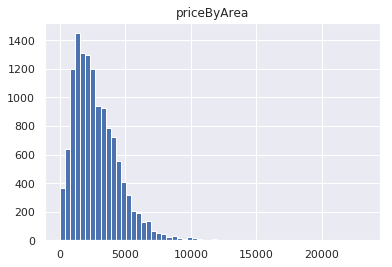

In [17]:
for element in df_numerical.columns:
    if element!= ('rooms'and 'index'):
        df.hist(element,bins=60)

In [18]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [19]:
df_tukey_NP = tukey_outliers(df,'numPhotos',extreme=False)
df_tukey_P = tukey_outliers(df,'price',extreme=False)
df_tukey_LA = tukey_outliers(df,'latitude',extreme=False)
df_tukey_LO = tukey_outliers(df,'longitude',extreme=False)
df_tukey_D = tukey_outliers(df,'distance',extreme=False)
df_tukey_PBA = tukey_outliers(df,'priceByArea',extreme=False)
print("El número de Outliers de la variable numPhotos es:",df_tukey_NP.shape[0])
print("El número de Outliers de la variable price es:",df_tukey_P.shape[0])
print("El número de Outliers de la variable latitude es:",df_tukey_LA.shape[0])
print("El número de Outliers de la variable longitude es:",df_tukey_LO.shape[0])
print("El número de Outliers de la variable distance es:",df_tukey_D.shape[0])
print("El número de Outliers de la variable priceByArea es:",df_tukey_PBA.shape[0])

El número de Outliers de la variable numPhotos es: 382
El número de Outliers de la variable price es: 1042
El número de Outliers de la variable latitude es: 0
El número de Outliers de la variable longitude es: 0
El número de Outliers de la variable distance es: 1136
El número de Outliers de la variable priceByArea es: 296


In [20]:
merged = pd.concat([df, df_tukey_NP, df_tukey_P, df_tukey_LA, df_tukey_LO, df_tukey_D, df_tukey_PBA])
merged.drop_duplicates (keep=False, inplace=True)
df = merged



### Comprobar dimensiones y balanceo del dataset (tras terminar limpieza del dataset)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10678 entries, 0 to 2113
Data columns (total 41 columns):
index                     5521 non-null float64
propertyCode              10678 non-null object
thumbnail                 10678 non-null object
externalReference         10678 non-null object
numPhotos                 10678 non-null float64
floor                     10678 non-null object
price                     10678 non-null float64
propertyType              10678 non-null object
operation                 10678 non-null object
size                      10678 non-null float64
exterior                  10678 non-null bool
rooms                     10678 non-null float64
bathrooms                 10678 non-null float64
address                   10678 non-null object
province                  10678 non-null object
municipality              10678 non-null object
district                  10678 non-null object
country                   10678 non-null object
neighborhood             



## 3. Análisis Exploratorio de Datos (4 puntos)



### Estudio de las variables categóricas

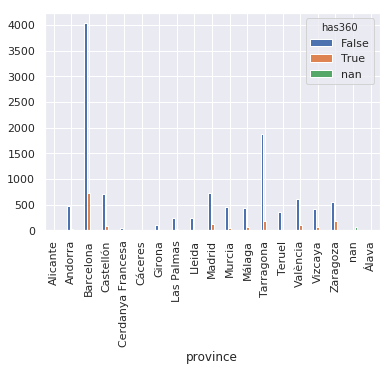

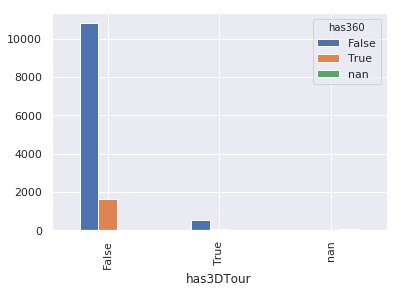

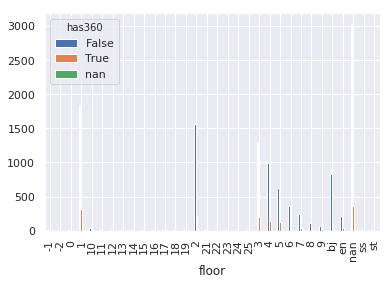

In [22]:
has360_province = pd.crosstab(index = df_categorical['province'], columns=df_categorical['has360'])
has360_province.plot.bar()
has360_has3dtour = pd.crosstab(index = df_categorical['has3DTour'], columns=df_categorical['has360'])
has360_has3dtour.plot.bar()
has360_floor = pd.crosstab(index = df_categorical['floor'], columns=df_categorical['has360'])
has360_floor.plot.bar()



### Convertir 3 variables categóricas a dummy. Se recomienda utilizar variables que no contengan demasiados posibles valores.

In [25]:
dummy_variables = [col for col in df_categorical.columns if col.startswith("hasPlan" or "has360" or "exterior")]
df_with_dummies = pd.get_dummies(df, columns=dummy_variables)
df_with_dummies.head()

,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,labels,parkingSpace,newDevelopmentFinished
0,0.0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,flat,sale,63.0,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso'}",True,False,False,False,False,False,nan,nan,nan
1,1.0,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,nan,178216.0,flat,sale,65.0,...,"{'subtitle': 'El Guinardó, Barcelona', 'title': 'Piso en Calle del Xiprer'}",False,False,False,False,False,False,nan,nan,nan
2,2.0,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,nan,333000.0,flat,sale,97.0,...,"{'subtitle': 'El Gòtic, Barcelona', 'title': 'Piso en Calle dels Còdols'}",False,False,True,False,False,False,nan,nan,nan
4,4.0,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,nan,481000.0,flat,sale,72.0,...,"{'subtitle': ""La Dreta de l'Eixample, Barcelona"", 'title': 'Piso en Rambla de Catalunya'}",False,False,True,False,False,False,nan,nan,nan
5,5.0,98225620,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/f1/1e/79/1004597535.jpg,LIM0000187135-AFFS1,17.0,5,291000.0,flat,sale,62.0,...,"{'subtitle': ""La Nova Esquerra de l'Eixample, Barcelona"", 'title': 'Piso en Av. de Roma'}",False,True,False,False,False,False,nan,nan,nan




### Crear variables derivadas en caso que nos parezca interesante incluir alguna

In [26]:
df_with_dummies['pricepermeters']=df_with_dummies['price']/df_with_dummies['size']
df_with_dummies.head()

,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,labels,parkingSpace,newDevelopmentFinished,pricepermeters
0,0.0,37423711,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/75/65/7d/1051146532.jpg,Z-2030,31.0,2,285000.0,flat,sale,63.0,...,True,False,False,False,False,False,nan,nan,nan,4523.809524
1,1.0,100030792,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/08/c0/ea/1065800123.jpg,2019,54.0,nan,178216.0,flat,sale,65.0,...,False,False,False,False,False,False,nan,nan,nan,2741.784615
2,2.0,95563945,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/cf/05/33/921983717.jpg,52931158,13.0,nan,333000.0,flat,sale,97.0,...,False,False,True,False,False,False,nan,nan,nan,3432.989691
4,4.0,95845899,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/17/29/61/930553000.jpg,52457390,10.0,nan,481000.0,flat,sale,72.0,...,False,False,True,False,False,False,nan,nan,nan,6680.555556
5,5.0,98225620,https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/f1/1e/79/1004597535.jpg,LIM0000187135-AFFS1,17.0,5,291000.0,flat,sale,62.0,...,False,True,False,False,False,False,nan,nan,nan,4693.548387




### Cálculo de la matriz de correlación

In [27]:
correlation_matrix = df_with_dummies.corr()
correlation_matrix_abs=correlation_matrix.applymap(lambda x: abs(x))



### Pintar la matriz de correlación

In [28]:
correlation_matrix = df_with_dummies.corr()
correlation_matrix_abs=correlation_matrix.applymap(lambda x: abs(x))



### Comprobar si hay variables correlacionadas

In [29]:
lista_corr=[]
for fila in correlation_matrix_abs:
    for columna in correlation_matrix_abs:  
        if (correlation_matrix_abs.loc[fila,columna]>0.8) and (fila!=columna) and correlation_matrix_abs.loc[fila,columna]!=1:
            lista_corr.append([fila,columna,correlation_matrix_abs.loc[fila,columna]])
            
df_corr=pd.DataFrame(lista_corr)

df_corr.rename(columns={0:'varX',1:'varY',2:'corr'}).sort_values(by='corr',ascending=False)


,varX,varY,corr
0,priceByArea,pricepermeters,1.0
1,pricepermeters,priceByArea,1.0
